## Atrayee Nag
### #Person: 50288651
### Ubit: atrayeen

## Amlan Gupta
### #Person: 50288686
### Ubit: amlangup


In [ ]:
library(ggplot2)
library(stringr)
library(repr)
library(plyr)
library(dplyr)
library(tidyr)
library(reshape2)
library(usmap)


old.par <- par(mar = c(0, 0, 0, 0))

# 1. Influenza Positive Tests Reported by U.S. Clinical Laboratories

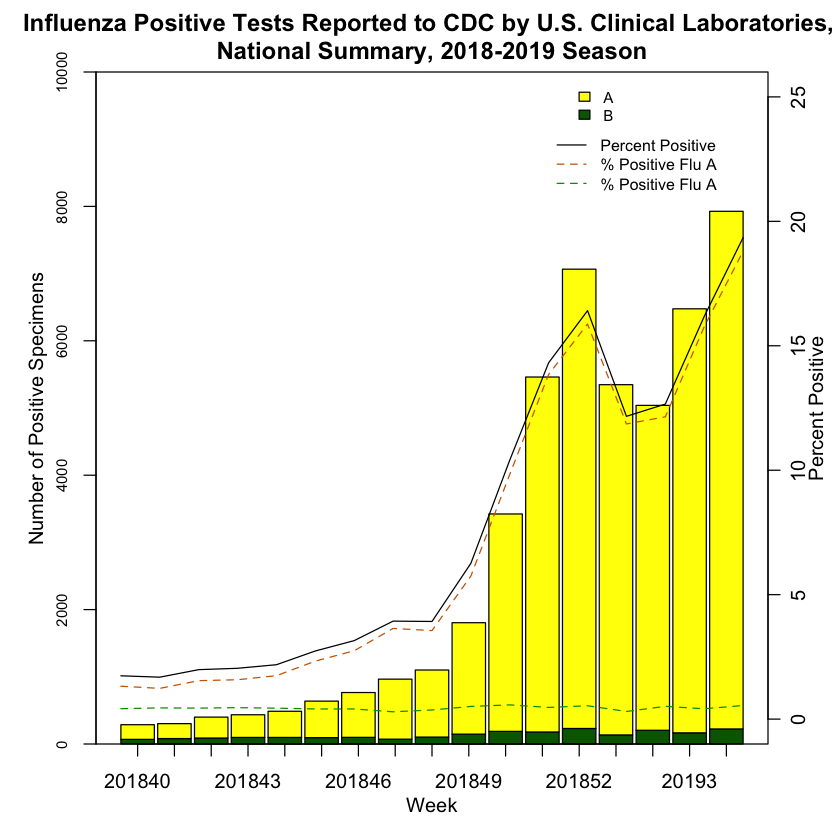

In [2]:
par(mar=c(4, 4, 3, 3), mgp=c(2, 0.75, 0))

# Collect data
natSumm<-read.csv("WHO_NREVSS_Clinical_Labs.csv", skip = 1)
natSumm <- natSumm[1:17,]

# Define color for the stacks
colors <- c("darkgreen", "yellow")

# Generate label for x-axis
weekLabel <- paste0(natSumm$YEAR, natSumm$WEEK)
lineLegend <- c("Percent Positive", "% Positive Flu A", "% Positive Flu A")

# Plot the graph
plt <- barplot(as.matrix(as.data.frame(t(natSumm[,7:6]))), main="Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories, \nNational Summary, 2018-2019 Season", beside=F, xlab="Week", ylab="Number of Positive Specimens", ylim=c(0,10000), names.arg=weekLabel, col=colors,axis.lty="solid", space=0.1, cex.axis=0.75, mgp = c(2, 1, 0))
par(new=TRUE)
plot(plt, natSumm$PERCENT.POSITIVE, type="l", col="black", ylim=c(0,25), lwd=1, xlab="", ylab="", xaxt = "n", yaxt = "n")
lines(plt, natSumm$PERCENT.A, type = "l", col = "#CC6600", lty=2)
lines(plt, natSumm$PERCENT.B, type = "l", col = "#009900", lty=2)
axis(4)
mtext("Percent Positive", side = 4, line = 1.5)

# Draw the legends
legend("topright",inset=c(0.22,0.01) ,legend=c("A","B"),fill=rev(colors), cex = 0.75, box.lty=0, pt.cex = 0.5)
legend("topright",inset=c(0.06,0.08),legend=lineLegend, col=c("black", "#CC6600", "#009900"), lty=c(1,2,2), cex=0.8, box.lty=0)


# 2. Influenza Positive Tests Reported by U.S. Public Health Laboratories

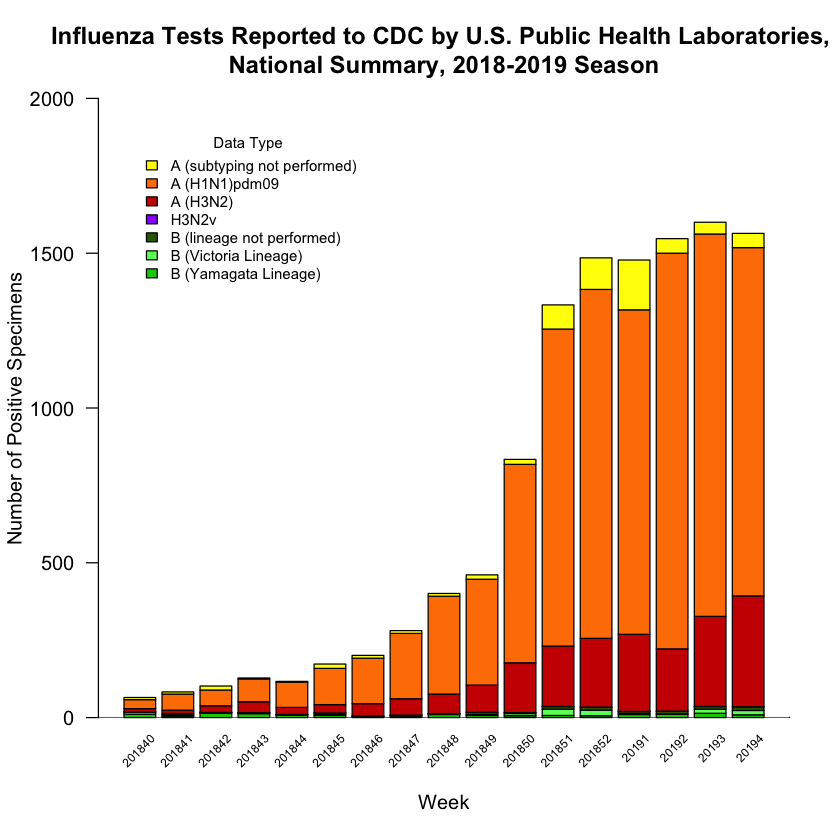

In [3]:

# Collect Data
ptests<-read.csv("WHO_NREVSS_Public_Health_Labs.csv", skip = 1)

# Manipulate the ordering of the columns
ptestsR <- ptests[1:17, c(1,2,3,4,5,11,10,9,12,7,6,8)]

# Generate labels for x-axis
weekLabel <- paste0(ptestsR$YEAR, ptestsR$WEEK)

# Define colors for each category
colors <- c("#00CC00", "#66FF66", "#336600", "#9933FF", "#CC0000", "#FF8000", "#FFFF00")

# Manually define the legend names
lineLegend <- c("A (subtyping not performed)", "A (H1N1)pdm09", "A (H3N2)", "H3N2v", "B (lineage not performed)", "B (Victoria Lineage)", "B (Yamagata Lineage)")

# Plot the graph
plt <- barplot(as.matrix(as.data.frame(t(ptestsR[,6:12]))), main="Influenza Tests Reported to CDC by U.S. Public Health Laboratories, \nNational Summary, 2018-2019 Season", beside=F,xlab="Week", ylab="Number of Positive Specimens", las=2, xaxt="n",ylim=c(0,2000),col=colors,axis.lty="solid")
legend("topleft",inset=c(0.05,0.05), legend = lineLegend, fill=rev(colors), title="Data Type", cex = 0.75, box.lty=0)
axis(1, at=weekLabel, labels = weekLabel, pos=1)
text(plt, par("usr")[3], srt = 45, labels= weekLabel,adj = c(1.1,3.1), xpd = TRUE, cex=0.6)
abline(h=0)

# 3. Pneumonia and Influenza (P&I) Mortality Surveillance

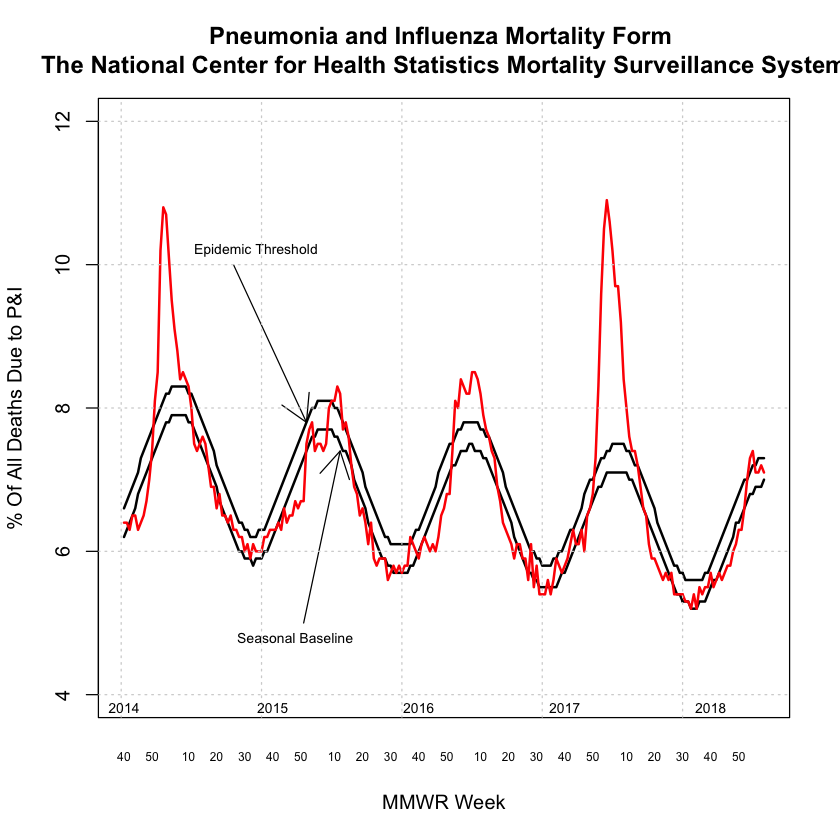

In [27]:
options(repr.plot.width=7, repr.plot.height=7)

nchs_data <- read.csv("National_2014-19_Data.csv", header= TRUE)
nchs_data <- separate(data = nchs_data, col = SEASON, into = c("YEAR", "NEXTYEAR"), sep = "-")

row.names(nchs_data) <- paste(nchs_data$YEAR,nchs_data$WEEK, sep="")



plot(nchs_data[,7],type="l",ylim=c(4,12),col="black",lty=1,ylab="% Of All Deaths Due to P&I",lwd=2,xlab="MMWR Week",xaxt="n", main="Pneumonia and Influenza Mortality Form \nThe National Center for Health Statistics Mortality Surveillance System")
lines(nchs_data[,8],type="l",col="black",lwd=2)
lines(nchs_data[,9],type="l",col="red",lwd=2)
arrows(40,10,66,7.8, col="black")
arrows(65,5,78,7.4, col="black")
text(48,10.2, labels="Epidemic Threshold", cex=0.7)
text(62,4.8, labels="Seasonal Baseline", cex=0.7)
grid()

# nchs_data$WEEK <- as.numeric(nchs_data$WEEK)

x_labels <- as.numeric(nchs_data$WEEK)
x_labels[x_labels %% 10!=0]  = NA

x_labels_yr <- as.numeric(nchs_data$YEAR)
x_labels_yr[nchs_data$WEEK != 40]  = NA


axis(1,at=c(1:nrow(nchs_data)),labels=x_labels, tick = FALSE, cex.axis=0.6)
par(mgp = c(0, -1, 0))
axis(1,at=c(1:nrow(nchs_data)),labels=x_labels_yr, tick = FALSE, cex.axis=0.7)


# 4. Percentage of Visits for Influenza-like Illness

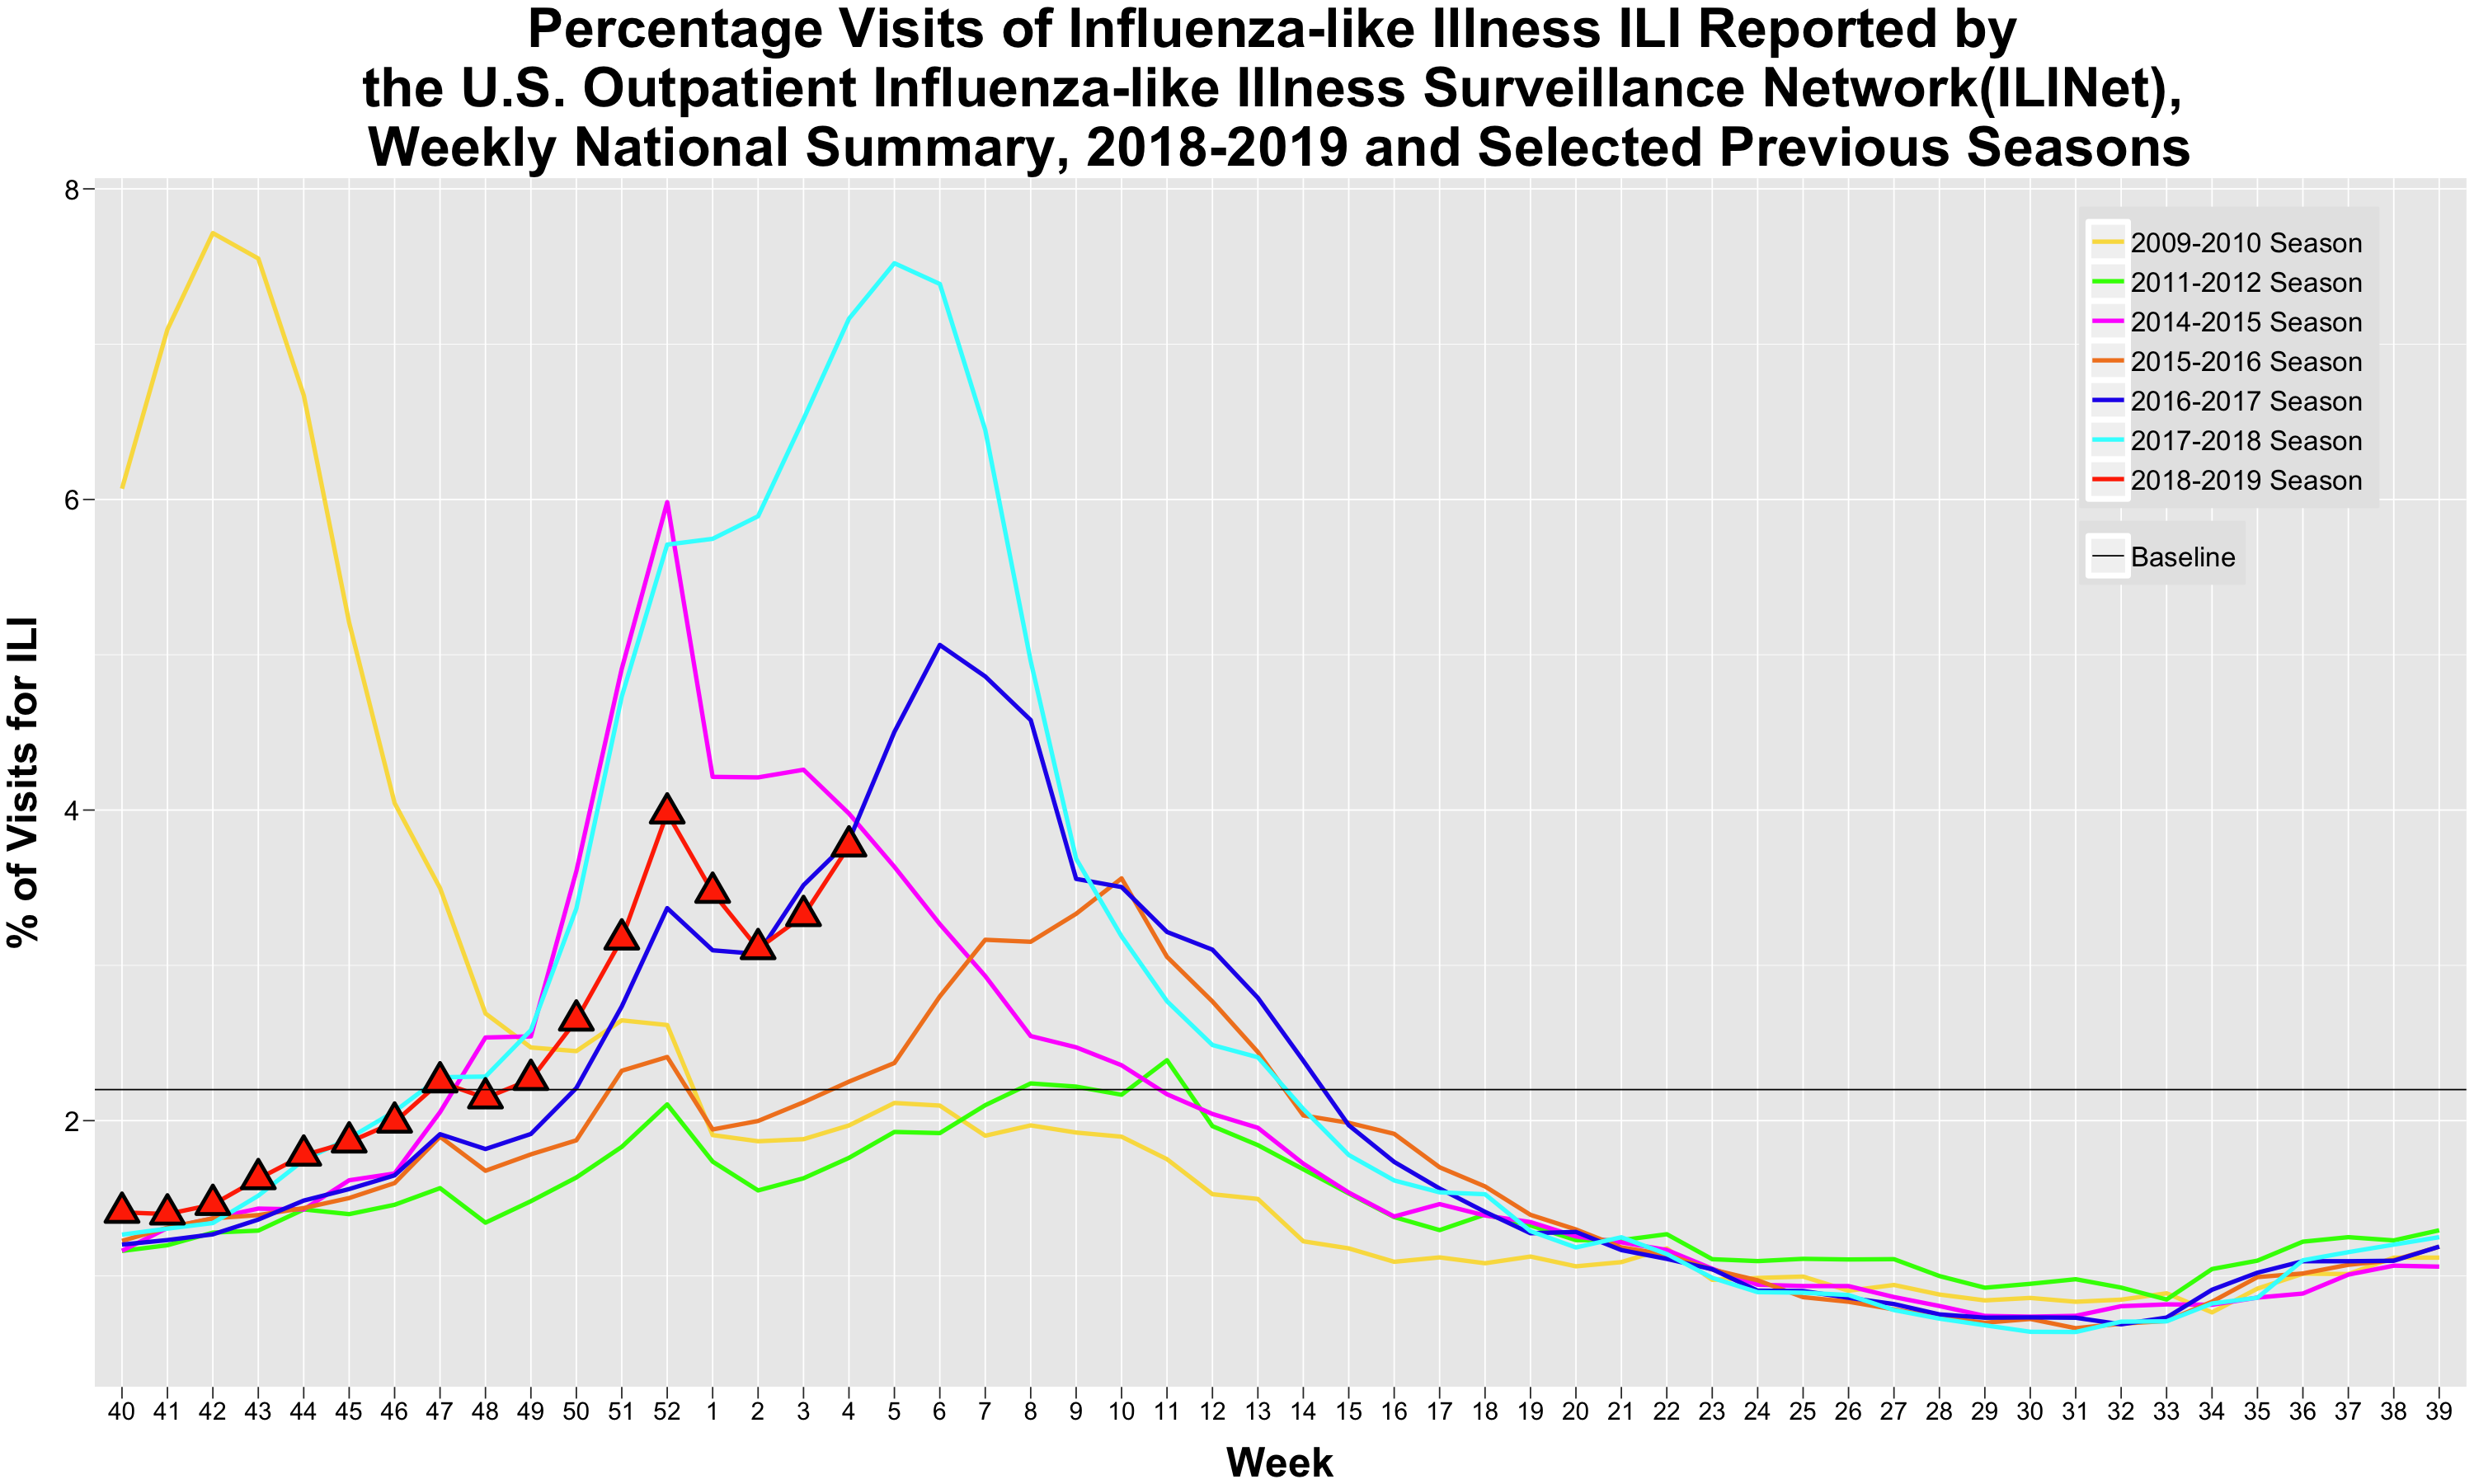

In [79]:
options(repr.plot.width=25, repr.plot.height=15)
par(mar=c(4, 4, 3, 3), mgp=c(2, 0.75, 0))
# Collect and manipulate Data
iliDat <- read.csv("ILINet_yearly.csv", skip = 1)
iliDat <- tail(iliDat,-5)
iliDat <- head(iliDat, -3)

# Define colors for yearly data
colors <- c("#00CC00", "#66FF66", "#336600", "#9933FF", "#CC0000", "#FF8000", "#FFFF00")

# Define the range for x-axis of the plot
xrange <- unique(iliDat$WEEK)


year_pairs <- data.frame("yearStart" = c(2009, 2011, 2014, 2015, 2016, 2017))

# Define range for x-axis for year and year+1
yearStartWeek <- seq(40,52)
yearEndWeek <- seq(1,39)

# Manipulate the yearly data to fit the curve
df <- data.frame(matrix(ncol = 16, nrow = 0))
x <- c("yearComb", colnames(iliDat))
colnames(df) <- x

# Plot line for each year in the graph 
plot <- ggplot()
for (i in 1:6) {
    currYear <- year_pairs[i,]
    pecrVectStart <- iliDat %>% 
                  filter(YEAR == currYear & WEEK %in% yearStartWeek)
    pecrVectEnd <- iliDat %>% 
                  filter(YEAR == currYear+1 & WEEK %in% yearEndWeek)
    
    pecrVect <- rbind(pecrVectStart,pecrVectEnd)
    
    dfYear <- data.frame("yearComb" = paste(paste(currYear, currYear+1, sep = "-"), "Season", sep = " "))
    dfYear <- cbind(dfYear, pecrVect)    
    df <- rbind(df,dfYear)
}


# Manipulate data for 2018-2019 fro missing valus after week 4 of 2019
pecrVect18 <- iliDat %>% 
                filter(YEAR == 2018 & WEEK %in% yearStartWeek)
pecrVect19 <- iliDat %>% 
                filter(YEAR == 2019)
pecrVectEnd <- rbind(pecrVect18,pecrVect19)
dfEnd <- data.frame("yearComb" = paste(paste(2018, 2019, sep = "-"), "Season", sep = " "))
dfEnd <- cbind(dfEnd, pecrVectEnd)
df <- rbind(df,dfEnd)
xrangeEnd <- unique(dfEnd$WEEK)
dfEnd$WEEK <- factor(dfEnd$WEEK, levels=xrangeEnd)
df$WEEK <- factor(df$WEEK, levels=xrange)


cutoff <- data.frame(yintercept=2.2, cutoff=factor("Baseline"))

# Plot the graph
p <- ggplot(data=df, aes(x=WEEK, y=X..WEIGHTED.ILI, group=yearComb, colour=yearComb)) + geom_line(size = 1.5)+
        ggtitle("Percentage Visits of Influenza-like Illness ILI Reported by \nthe U.S. Outpatient Influenza-like Illness Surveillance Network(ILINet), \nWeekly National Summary, 2018-2019 and Selected Previous Seasons")+
#         geom_hline(yintercept=2.2, linetype="dashed", color = "black", size=1.8)+
        geom_point(data=dfEnd, aes(x=WEEK, y = X..WEIGHTED.ILI, colour=yearComb), colour = "black", shape=24, fill="#FF3300", size=7, stroke=2) + 
        labs(x="Week",y="% of Visits for ILI")+
        theme(legend.position = c(0.9, 0.82),
            legend.background = element_rect(color = "grey90", 
            fill = "grey90", size = 1),
            legend.text=element_text(size=20),
            axis.text.x = element_text(size = 18, hjust = 0.5, colour="black", vjust=1),
            axis.text.y = element_text(size = 20, angle = 0, hjust = 0, vjust = 0.5, colour="black"),
            axis.title=element_text(size=30,face="bold"),
            axis.ticks.length=unit(.30, "cm"),
            legend.title = element_blank(),
            axis.title.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
            axis.title.x = element_text(margin = margin(t = 20, r = 0, b = 0, l = 0)),
            legend.key = element_rect(size = 2),
            legend.key.size = unit(2, 'lines'),
            plot.title = element_text(size = 40, face = "bold", hjust = 0.5)
         )       
p + scale_colour_manual(values = c("2009-2010 Season" = "#f9dc4e", "2011-2012 Season" = "#33FF00", "2014-2015 Season" = "#FF00FF", "2015-2016 Season" = "#F28323", "2016-2017 Season" = "#250EEC", "2017-2018 Season" = "#33FFFF", "2018-2019 Season" = "#FF3300")) +
geom_hline(aes(yintercept=yintercept, linetype=cutoff), data=cutoff, color= "black")






# 5. Heat Map of USA : Influenza-like Illness

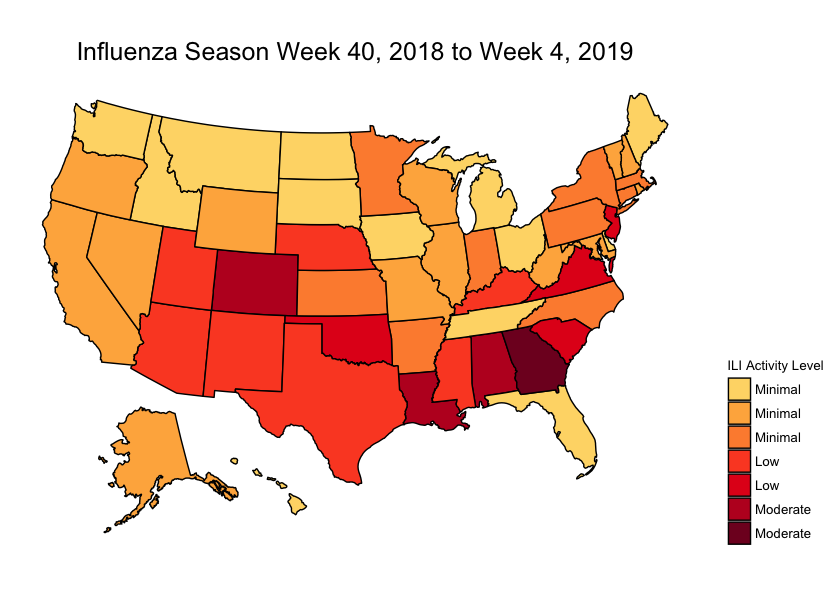

In [80]:
options(repr.plot.width=7, repr.plot.height=5)
par(old.par)
ili_activity_level = read.csv("StateDatabyWeekforMap_2018-19week40-4.csv")
act <- ili_activity_level[c(1,4,5,7)]

act <-separate(data = act, col = ACTIVITY.LEVEL, into = c("leveltext", "levelvalue"), sep = " ")

act$levelvalue <- as.numeric(act$levelvalue)

label_list <- unique(act[c("levelvalue", "ACTIVITY.LEVEL.LABEL")])

level_by_state <- ddply(act, .(STATENAME), summarize,  Level=ceiling(mean(levelvalue)))
names(level_by_state) <- c("full","level")

state_data <- merge(statepop,level_by_state, by="full")
state_data$level <- as.character(state_data$level)


color_pallete <- c("0" = "#ffffcc", "1" = "#ffeda0", "2" = "#fed976", "3" = "#feb24c", 
                   "4" = "#fd8d3c", "5" = "#fc4e2a", "6" = "#e31a1c", "7" = "#bd0026", 
                   "8" = "#800026",  "9" = "#FA4F00", "10" = "#CC0000")




plot_usmap(data = state_data, values = "level",  labels = FALSE) + 
scale_fill_manual(values = color_pallete, name= "ILI Activity Level",guide = 'legend', labels= label_list[order(label_list$levelvalue),][["ACTIVITY.LEVEL.LABEL"]] ) +
labs(title = "Influenza Season Week 40, 2018 to Week 4, 2019") +
theme(legend.position = "right",
      legend.text=element_text(size=8),
      legend.key.size = unit(1,"line"),
      legend.title = element_text(size = 8),
      plot.title = element_text(size = 15, hjust = 0.5)
      
     )



# 6. Influenza Positive Tests by U.S. Clinical Laboratories : 52 Weeks

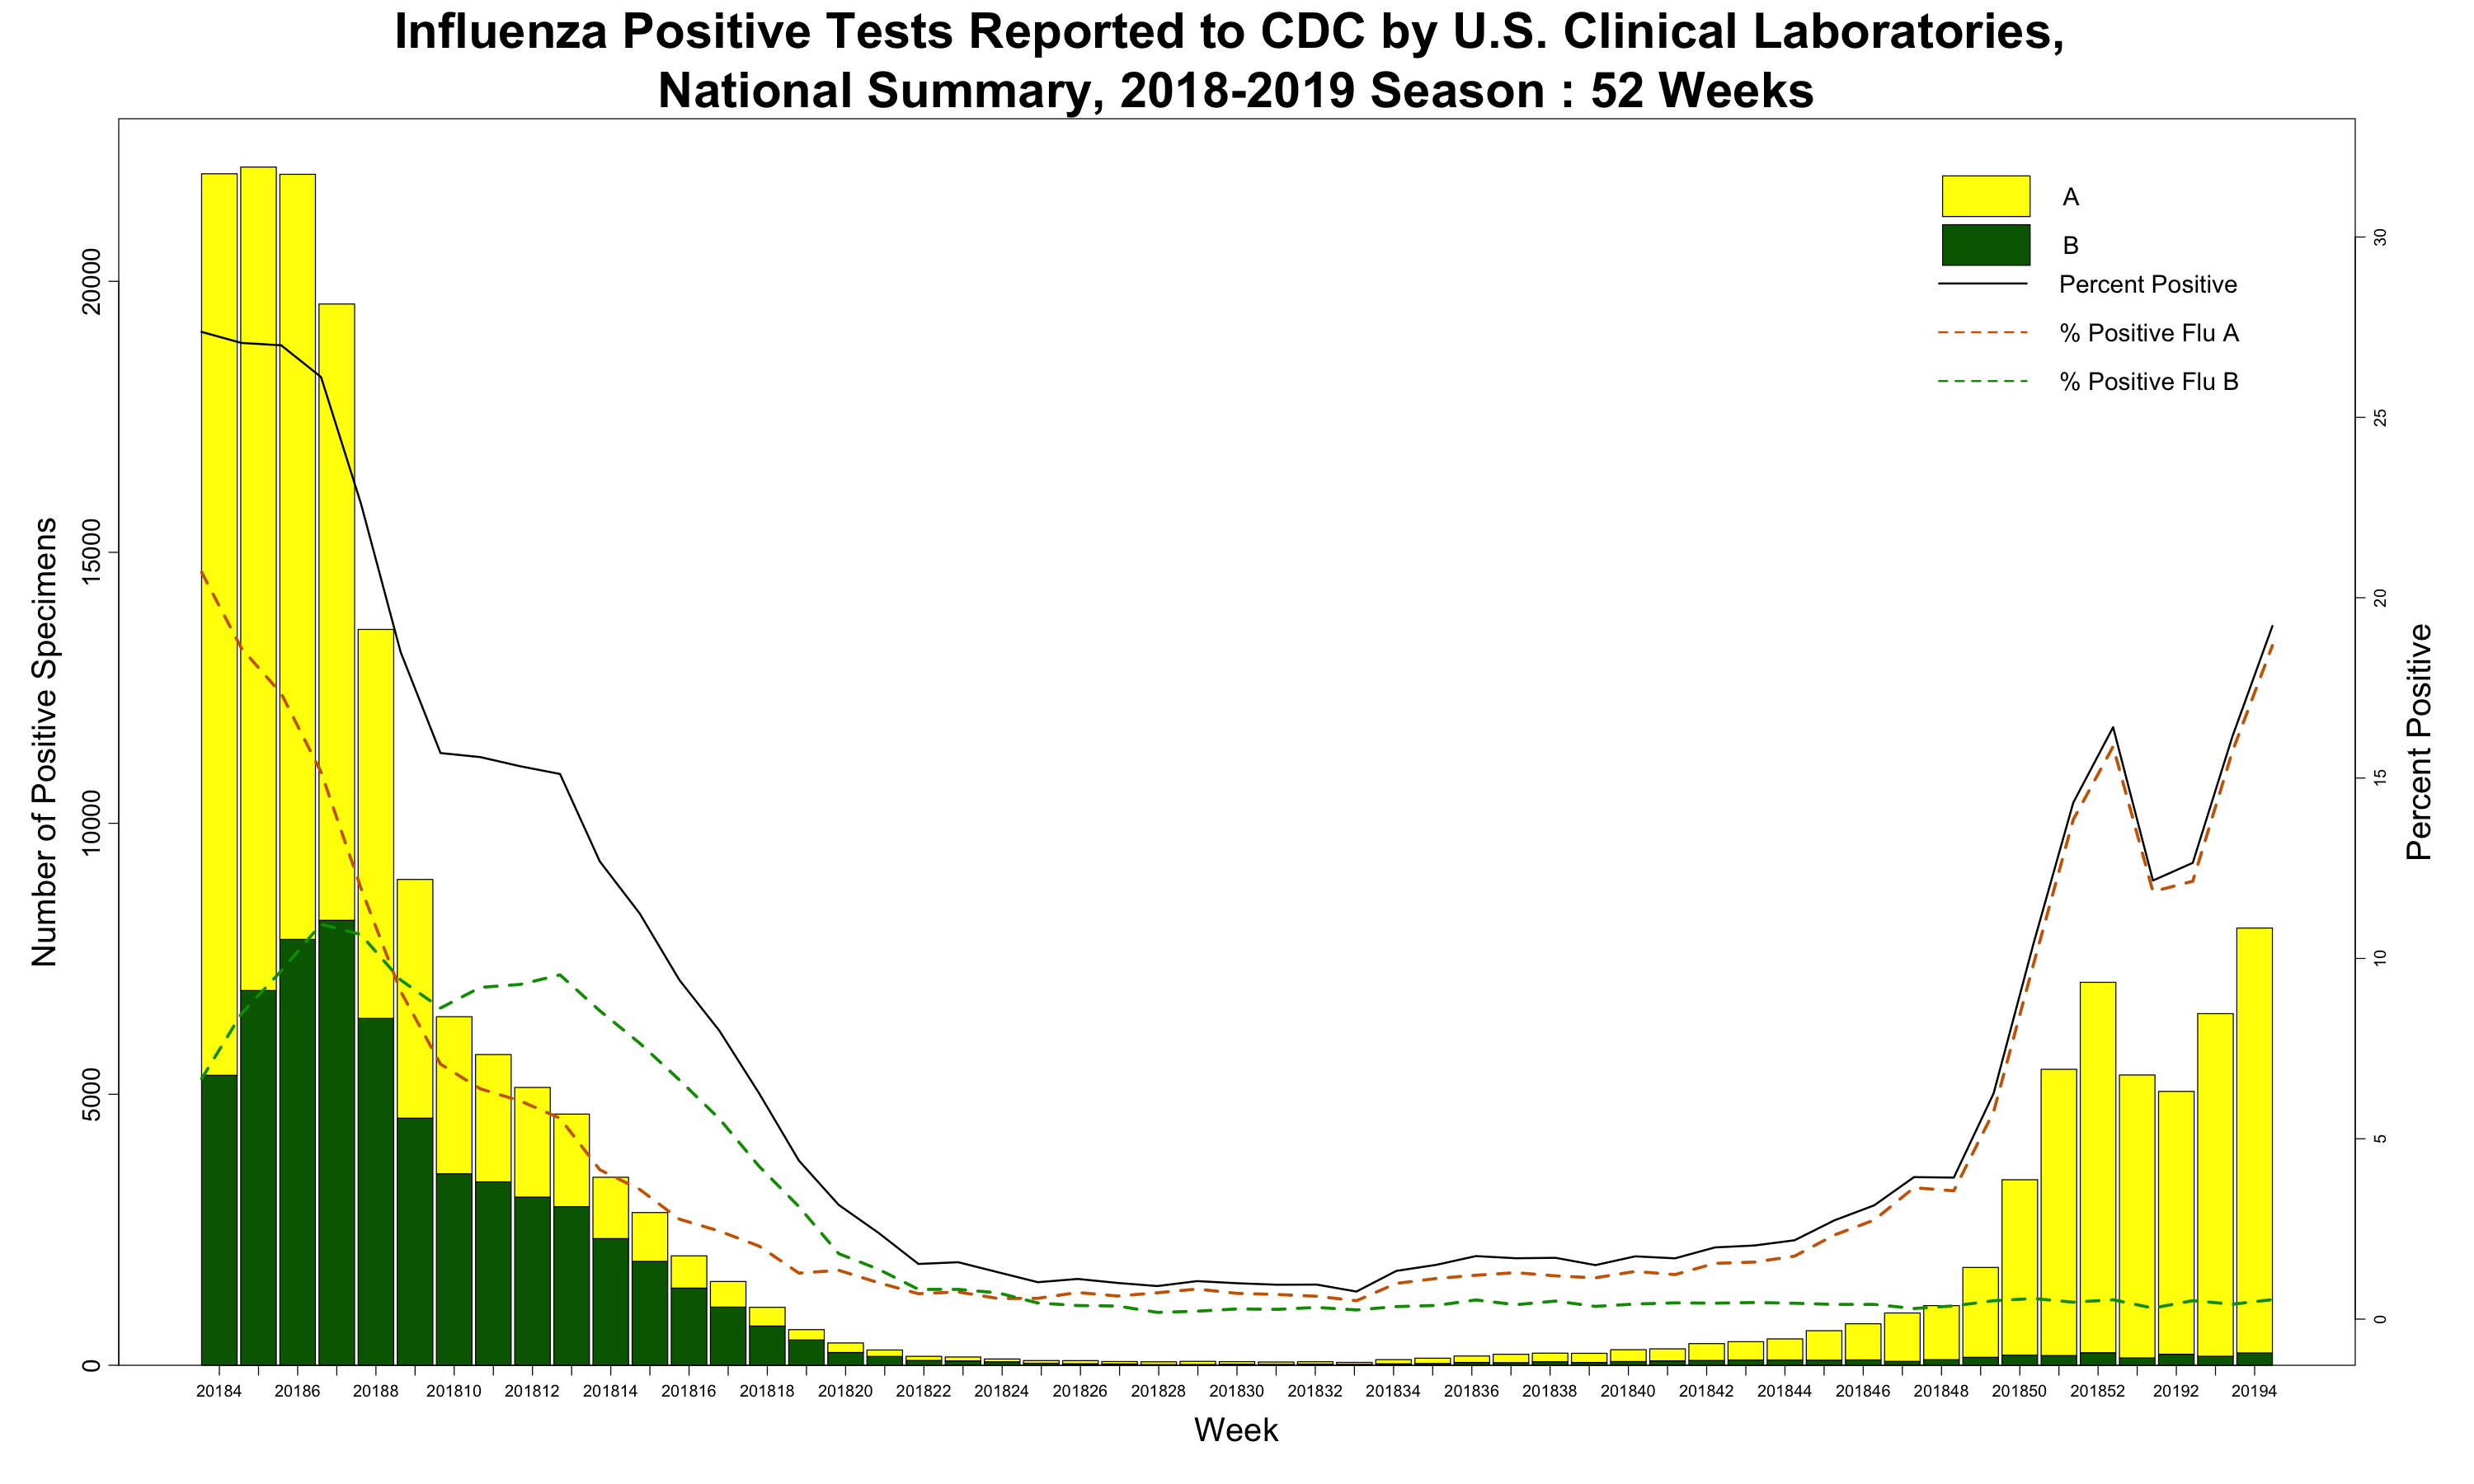

In [20]:
options(repr.plot.width=25, repr.plot.height=15)
# Collect Data
natSumm<-read.csv("WHO_NREVSS_Clinical_Labs_52.csv", skip = 1)
natSumm <- natSumm[17:69,]

# Define colors for each category
colors <- c("darkgreen", "yellow")

year <- natSumm[,3]
weeks <- natSumm[,4]
weekLabel <- paste0(year, weeks)
posPerc <- natSumm[,8]
posAPerc <- natSumm[,9]
posBPerc <- natSumm[,10]

# Define legend text for each category
lineLegend <- c("Percent Positive", "% Positive Flu A", "% Positive Flu B")

par(mar=c(6, 6, 6, 6), mgp=c(2, 0.75, 0))

# Plot the graph
plt <- barplot(as.matrix(as.data.frame(t(natSumm[,7:6]))), main="Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories, \nNational Summary, 2018-2019 Season : 52 Weeks", cex.main=3, beside=F, ylim=c(0,23000), names.arg=weekLabel, col=colors,axis.lty="solid", space=0.1, cex.lab=2, cex.axis=1.5)
par(new=TRUE)
plot(plt, posPerc, type="l", col="black", ylim=c(0,32), lwd=2, xlab="", ylab="", xaxt = "n", yaxt = "n")
lines(plt, posAPerc, type = "l", col = "#CC6600", lty=2, lwd=3)
lines(plt, posBPerc, type = "l", col = "#009900", lty=2, lwd=3)
axis(4)
mtext("Percent Positive", side = 4, line = 3, cex=2)
mtext("Week", side = 1, line = 3, cex=2)
mtext("Number of Positive Specimens", side = 2, line = 3, cex=2, cex.lab=5)
legend("topright",inset=c(0.07,0.01) ,legend=c("A","B"),fill=rev(colors), cex = 1.5, box.lty=0, pt.cex = 0.5, x.intersp=0.3, y.intersp=0.6)
legend("topleft",inset=c(0.765,0.08),legend=lineLegend, col=c("black", "#CC6600", "#009900"), lty=c(1,2,2), cex=1.5, box.lty=0, x.intersp=0.3, y.intersp=0.6, seg.len=0.8, lwd=2)



# 7. Influenza Positive Tests by U.S. Public Health Laboratories : 52 Weeks

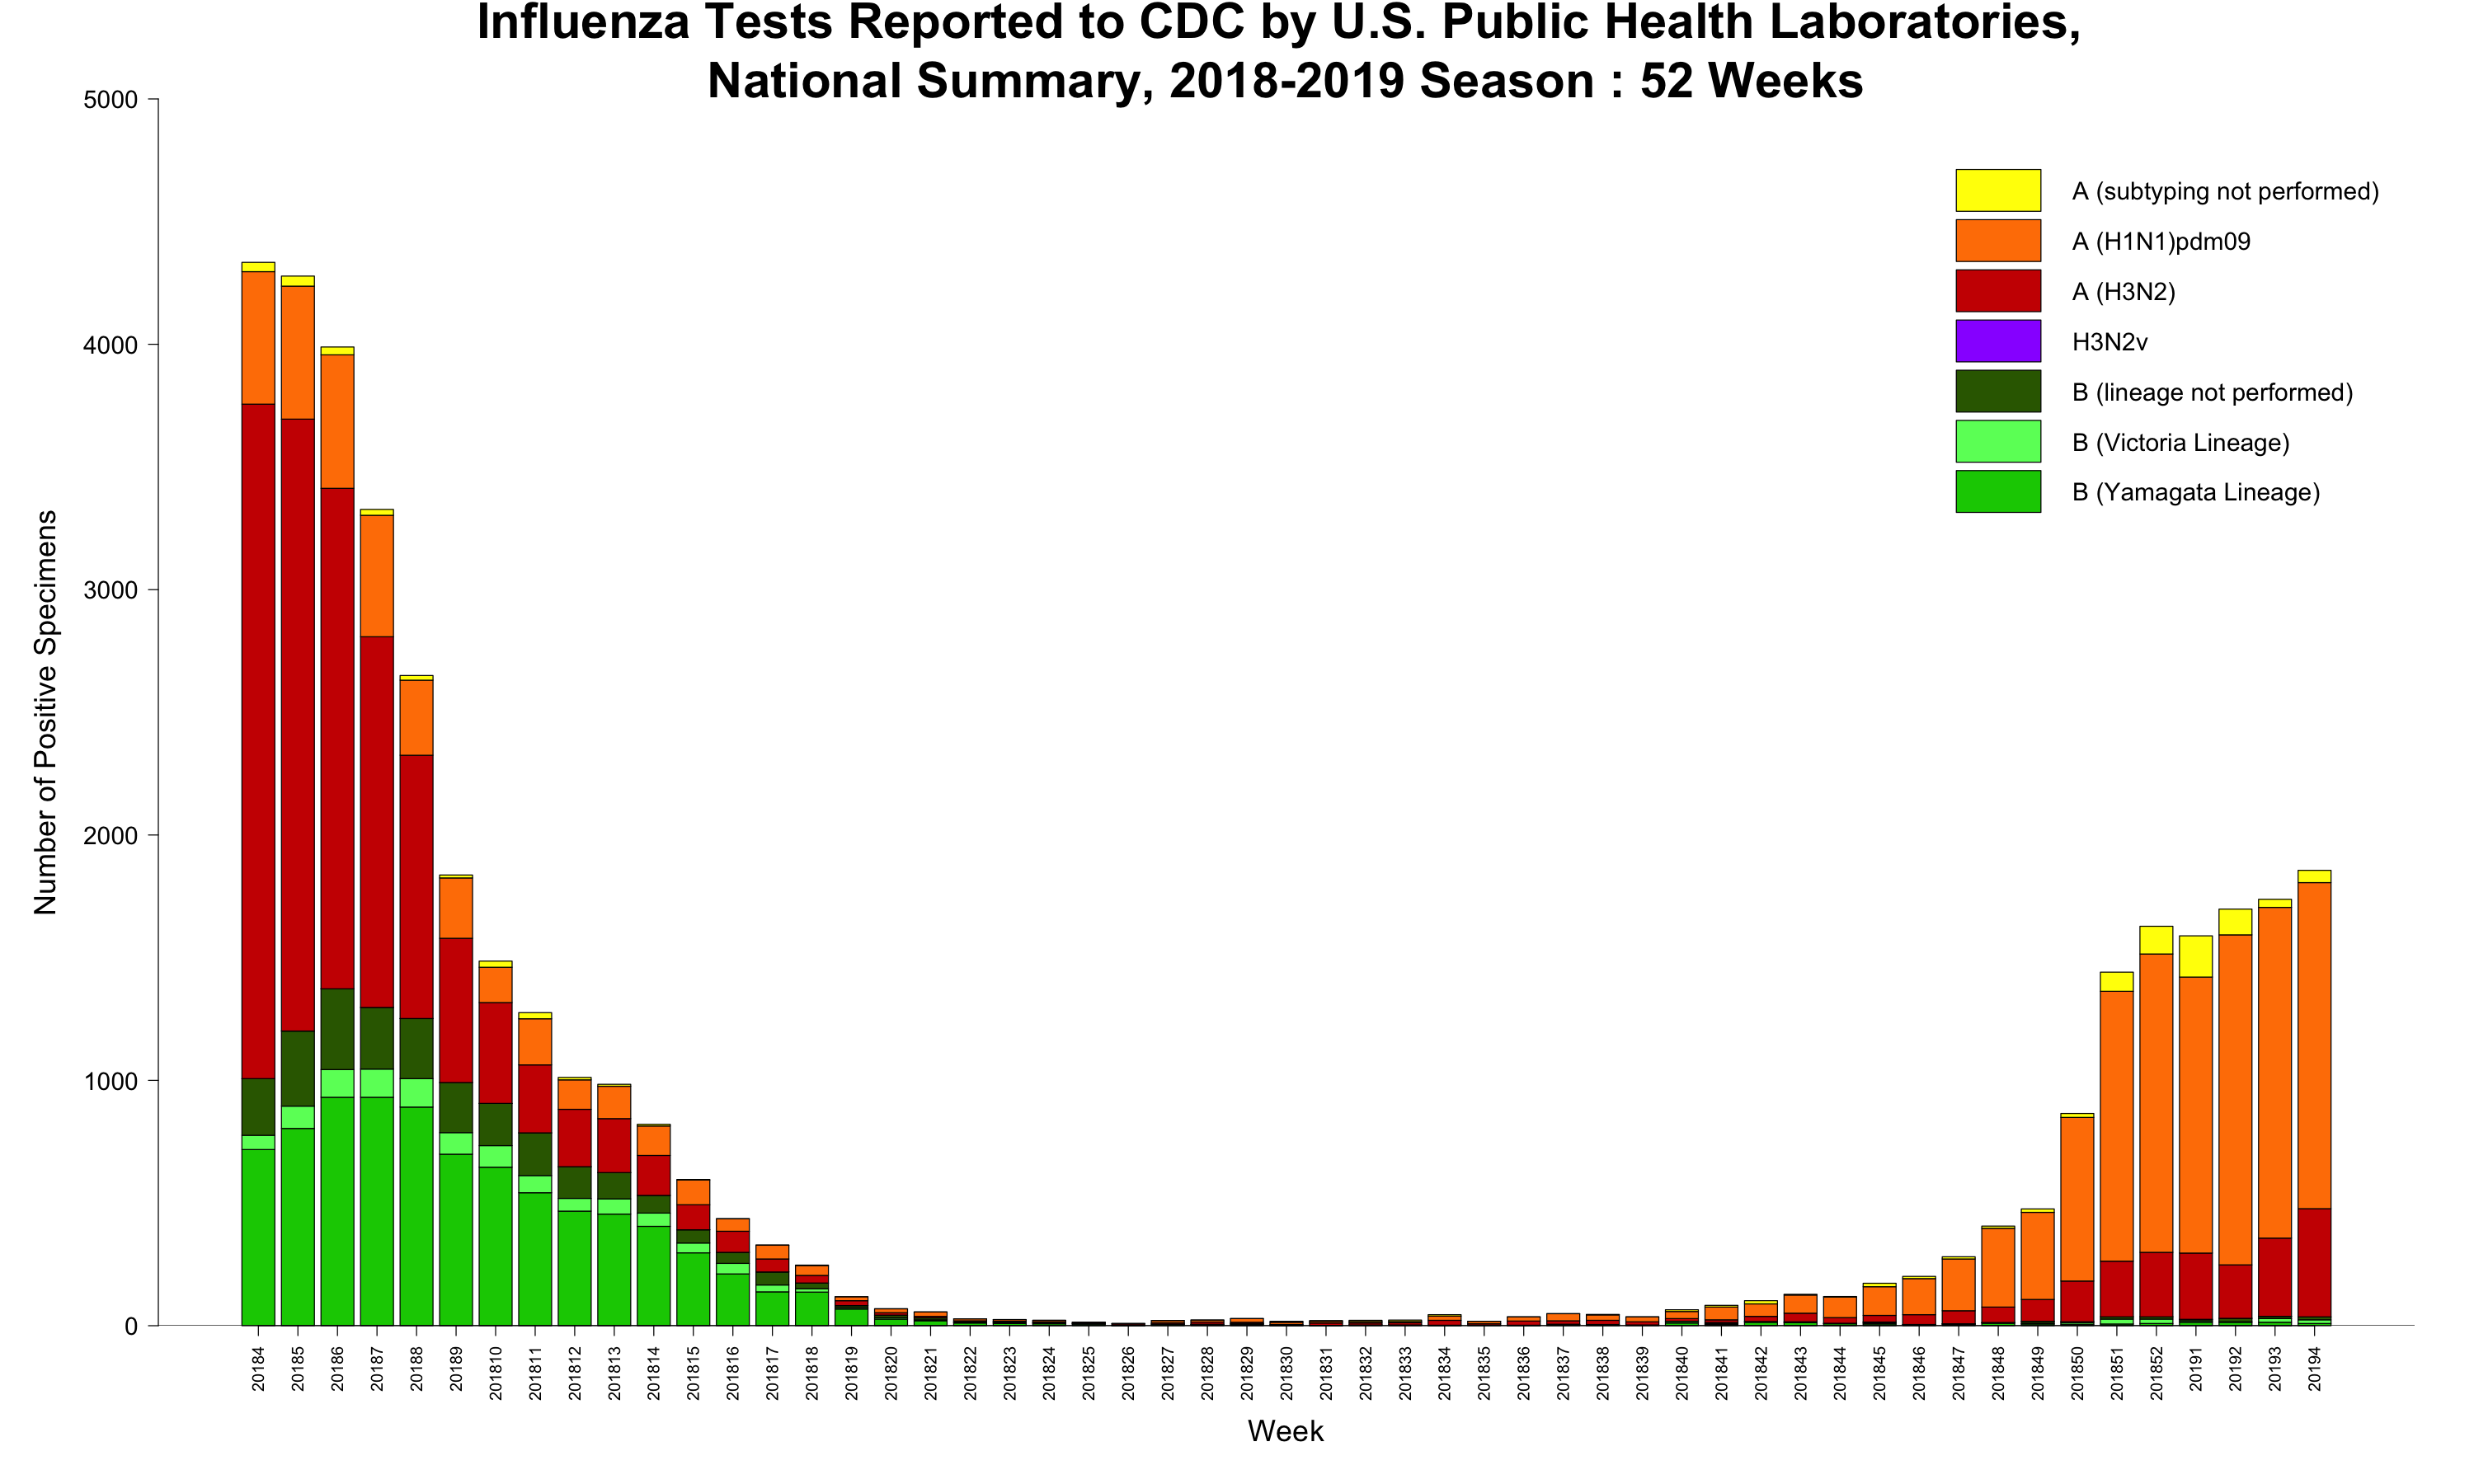

In [21]:
par(mar=c(8, 8, 5, 3))

# Collect Data
ptests<-read.csv("WHO_NREVSS_Public_Health_Labs_52.csv", skip = 1)

# Manipulate the ordering of the data
ptestsR <- ptests[17:69, c(1,2,3,4,5,11,10,9,12,7,6,8)]

year <- ptestsR[,3]
weeks <- ptestsR[,4]

# Generate labels for x-axis
weekLabel <- paste0(year, weeks)

# Define colors for each category
colors <- c("#00CC00", "#66FF66", "#336600", "#9933FF", "#CC0000", "#FF8000", "#FFFF00")

# Define text for the legends
lineLegend <- c("A (subtyping not performed)", "A (H1N1)pdm09", "A (H3N2)", "H3N2v", "B (lineage not performed)", "B (Victoria Lineage)", "B (Yamagata Lineage)")

# Plot the graph
plt <- barplot(as.matrix(as.data.frame(t(ptestsR[,6:12]))), main="Influenza Tests Reported to CDC by U.S. Public Health Laboratories, \nNational Summary, 2018-2019 Season : 52 Weeks", cex.main=3, beside=F, names.arg=weekLabel, las=2,ylim=c(0,5000),col=colors,axis.lty="solid", cex.lab=2, cex.axis=1.5)
legend("topleft",inset=c(0.75,0.02),legend = lineLegend,fill=rev(colors), cex = 1.5, box.lty=0,x.intersp=0.3, y.intersp=0.6)
mtext("Week", side = 1, line = 5, cex = 1.8)
mtext("Number of Positive Specimens", side = 2, line = 5, cex = 1.8)
abline(h=0)

# 8. Influenza Positive Tests by U.S. Clinical Lab for New York State : 52 Weeks

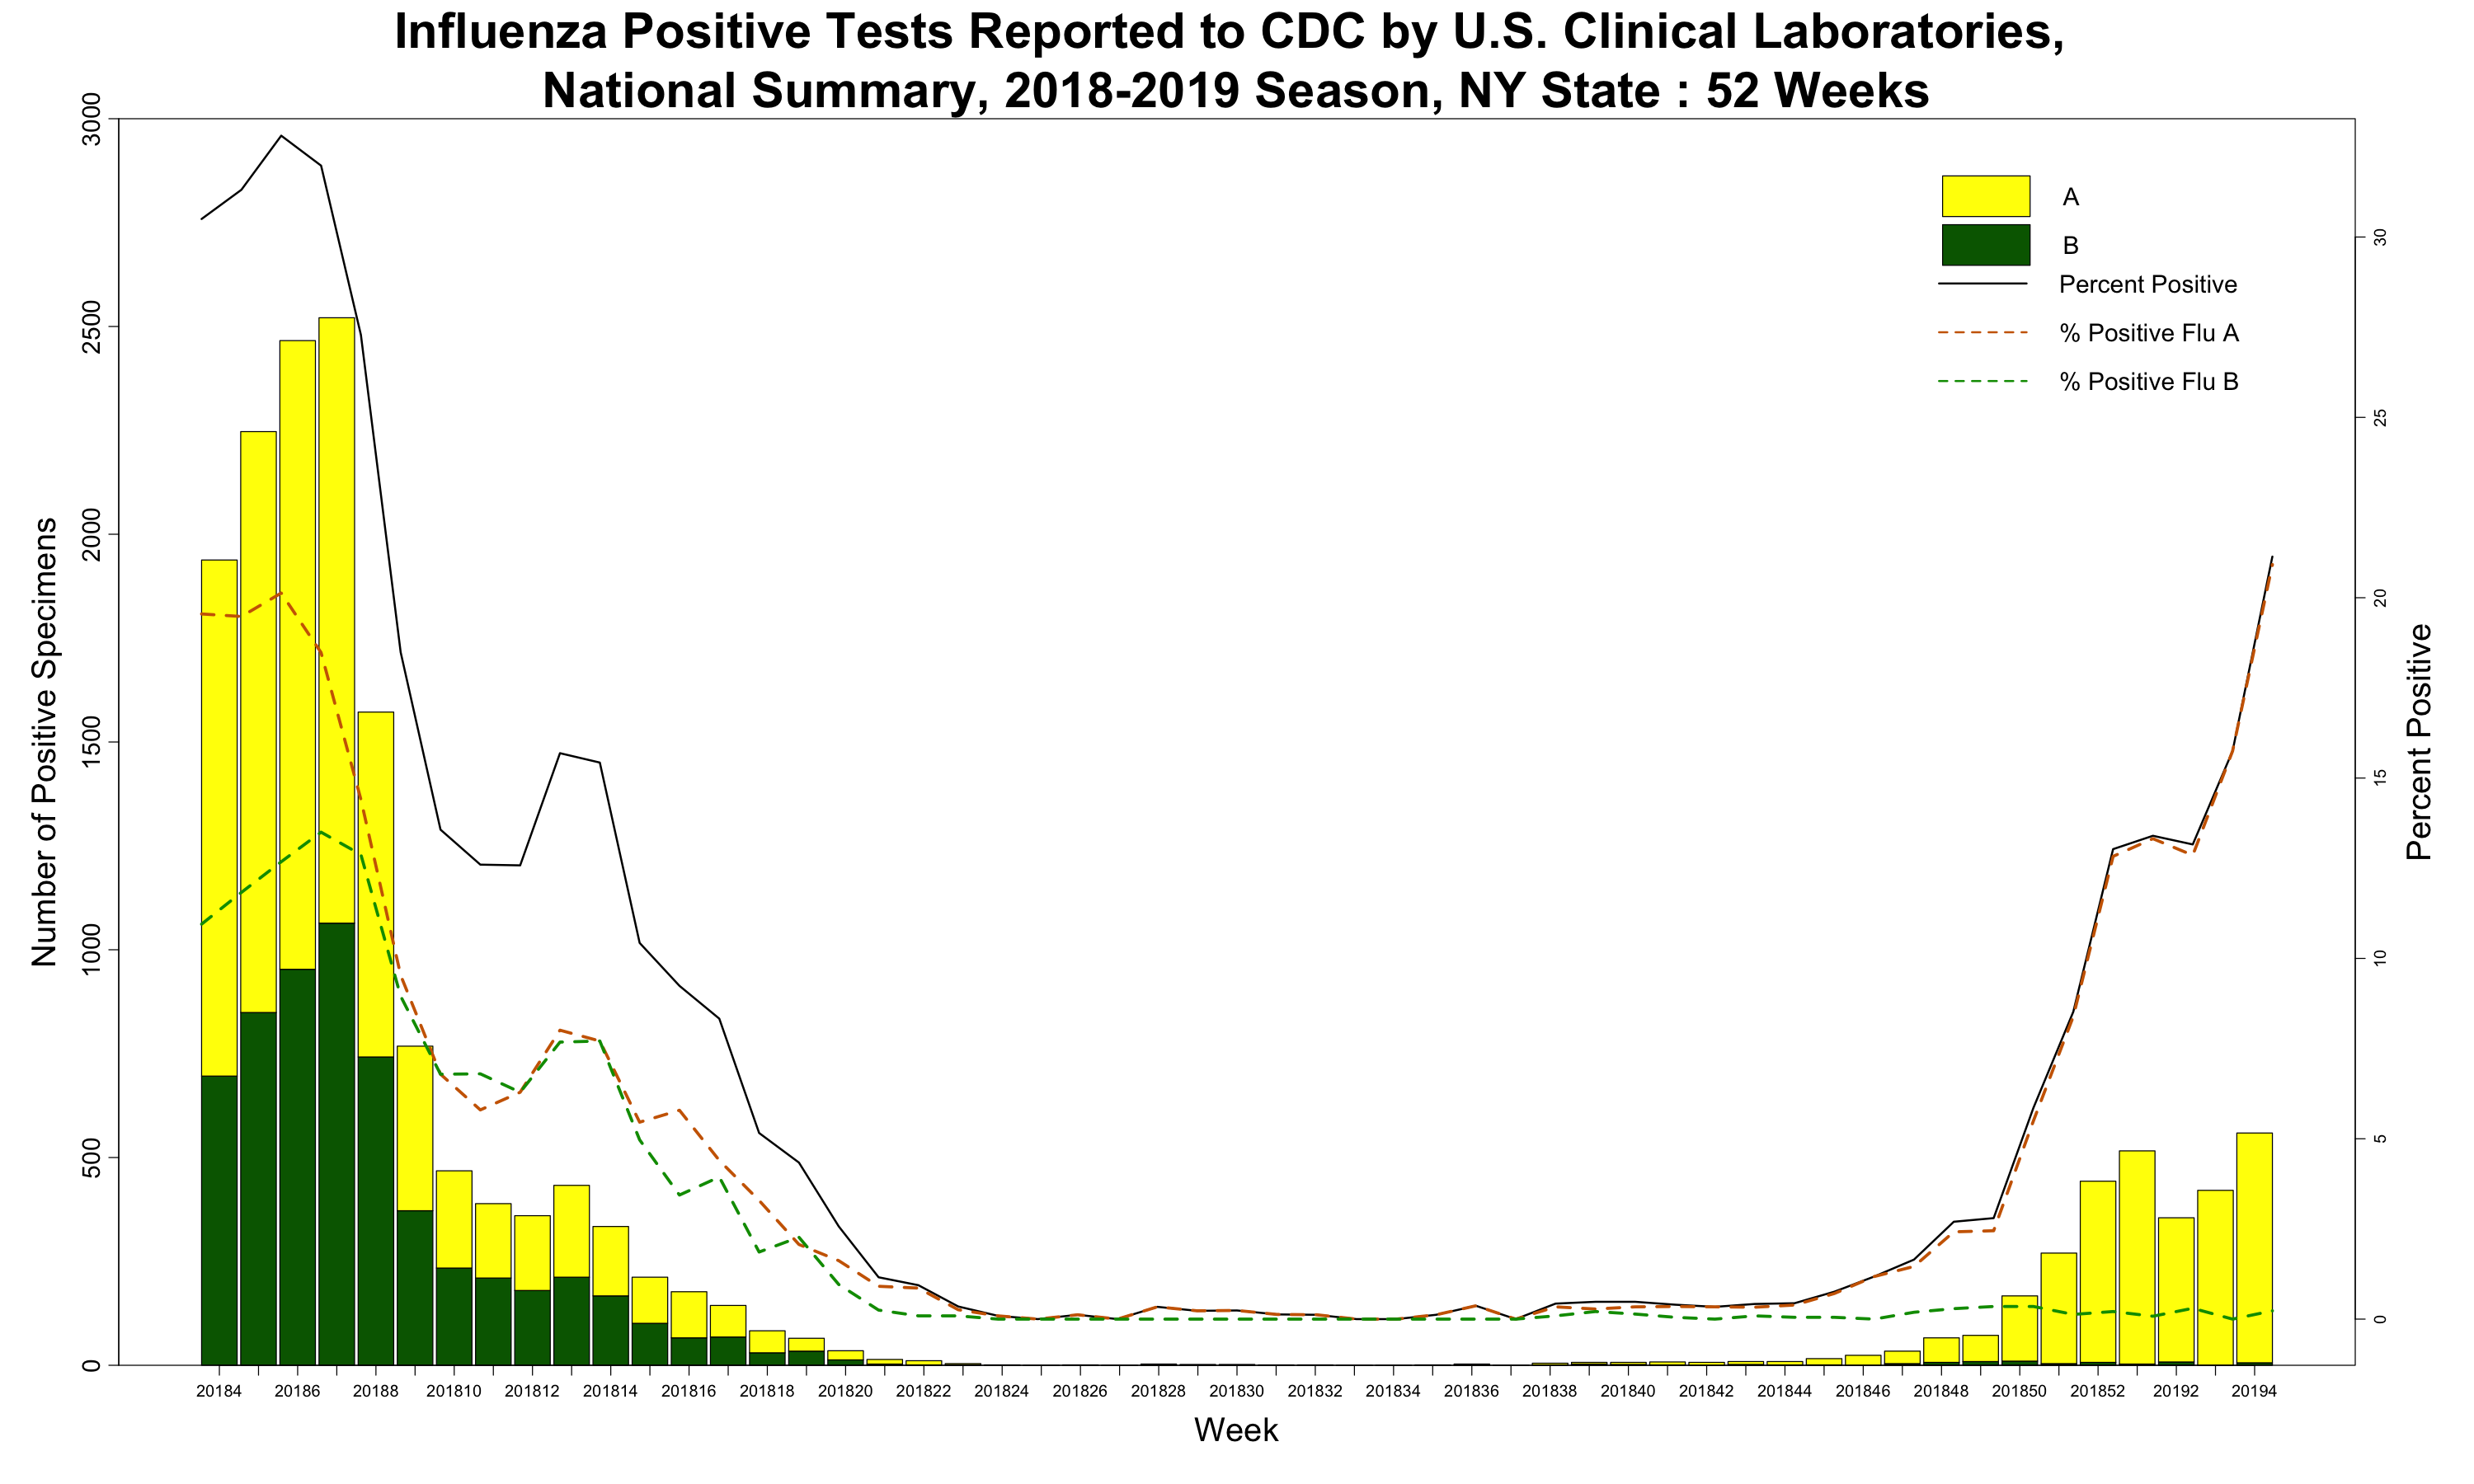

In [23]:
# Collect Data
natSumm<-read.csv("WHO_NREVSS_Clinical_Labs_NY.csv", skip = 1)
natSumm <- natSumm[17:69,]

# Define colors for each category
colors <- c("darkgreen", "yellow")

year <- natSumm[,3]
weeks <- natSumm[,4]
weekLabel <- paste0(year, weeks)
posPerc <- natSumm[,8]
posAPerc <- natSumm[,9]
posBPerc <- natSumm[,10]

# Define text for each legend
lineLegend <- c("Percent Positive", "% Positive Flu A", "% Positive Flu B")

par(mar=c(6, 6, 6, 6), mgp=c(2, 0.75, 0))

# Plot the graph
plt <- barplot(as.matrix(as.data.frame(t(natSumm[,7:6]))), main="Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories, \nNational Summary, 2018-2019 Season, NY State : 52 Weeks", cex.main=3, beside=F, ylim=c(0,3000), names.arg=weekLabel, col=colors,axis.lty="solid", space=0.1, cex.lab=2, cex.axis=1.5)
par(new=TRUE)
plot(plt, posPerc, type="l", col="black", ylim=c(0,32), lwd=2, xlab="", ylab="", xaxt = "n", yaxt = "n")
lines(plt, posAPerc, type = "l", col = "#CC6600", lty=2, lwd=3)
lines(plt, posBPerc, type = "l", col = "#009900", lty=2, lwd=3)
axis(4)
mtext("Percent Positive", side = 4, line = 3, cex=2)
mtext("Week", side = 1, line = 3, cex=2)
mtext("Number of Positive Specimens", side = 2, line = 3, cex=2, cex.lab=5)
legend("topright",inset=c(0.07,0.01) ,legend=c("A","B"),fill=rev(colors), cex = 1.5, box.lty=0, pt.cex = 0.5, x.intersp=0.3, y.intersp=0.6)
legend("topleft",inset=c(0.765,0.08),legend=lineLegend, col=c("black", "#CC6600", "#009900"), lty=c(1,2,2), cex=1.5, box.lty=0, x.intersp=0.3, y.intersp=0.6, seg.len=0.8, lwd=2)